# Gradient Tape Basic

In [3]:
import tensorflow as tf

In [1]:
test1 = [1, 2, 3]
test2 = [10, 20, 30]

In [4]:
t1 = tf.Variable(test1, dtype=tf.float32)
t2 = tf.Variable(test2, dtype=tf.float32)

In [5]:
with tf.GradientTape() as tape:
    t3 = t1 * t2

gradient = tape.gradient(t3, [t1, t2])
print(gradient[0])
print(gradient[1])

tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)
tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


In [6]:
test1 = [1, 2, 3]
test2 = [10, 20, 30]

In [7]:
t1 = tf.constant(test1, dtype=tf.float32)
t2 = tf.Variable(test2, dtype=tf.float32)

with tf.GradientTape() as tape:
    tape.watch(t1)
    t3 = t1 * t2

gradients = tape.gradient(t3, [t1, t2])
print(gradients[0])
print(gradients[1])

tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)
tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


# Gradient Tape를 이용해서  Linear Regression 구현

In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [9]:
## data 선언
x_data =[[1.],[2.],[3.],[4.]]
y_data =[[1.],[3.],[5.],[7.]]

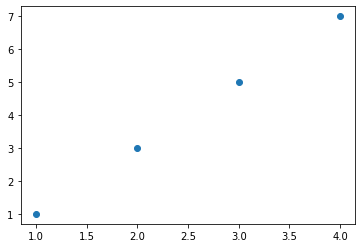

In [10]:
plt.plot(x_data, y_data, 'o')

In [11]:
## 평균 0, 분산 1의 파라미터의 정규분포로 부터 값을 가져옴.
# 학습을 통해 업데이트가 되어 변화되는 모델의 파라미터인 w,b를 의미한다.
W = tf.Variable(tf.random.normal((1,1),mean=0, stddev=1.0))
b = tf.Variable(tf.random.normal((1,1),mean=0, stddev=1.0))
lr = 0.001
history = np.zeros([2000,3], 'float32')

In [12]:
w = np.array(W)
w = w.reshape(1)
B = np.array(b)
B = B.reshape(1)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


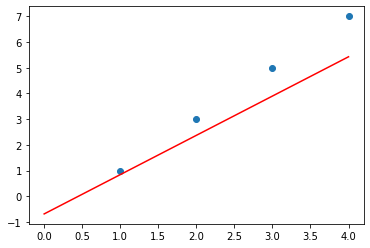

In [13]:
plt.plot(x_data, y_data, 'o')
plt.plot([0,4], [b, (w*4 +B)], 'r-')

In [14]:
w_trace = []
b_trace = []

In [15]:
for epoch in range(2000):
    total_error = 0

    for x, y in zip(x_data, y_data):
        with tf.GradientTape() as tape:
            y_hat = W * x + b
            error = (y_hat - y) **2
        
        gradients = tape.gradient(error, [W, b]) # 별명.gradient(타겟값, [업데이터시킬 파라미터, ...])

        W = tf.Variable(W - lr * gradients[0])
        b = tf.Variable(b - lr * gradients[1])

        w_trace.append(W.numpy())
        b_trace.append(b.numpy())

        visual_error = tf.square(error)
        total_error = total_error + visual_error

    print("epoch : ", epoch, "error :", total_error/len(x_data))
    history[epoch,:] = [(total_error/len(x_data))[0], W[0], b[0]]

epoch :  0 error : tf.Tensor([[1.7775513]], shape=(1, 1), dtype=float32)
epoch :  1 error : tf.Tensor([[1.3846369]], shape=(1, 1), dtype=float32)
epoch :  2 error : tf.Tensor([[1.080213]], shape=(1, 1), dtype=float32)
epoch :  3 error : tf.Tensor([[0.84408766]], shape=(1, 1), dtype=float32)
epoch :  4 error : tf.Tensor([[0.66071737]], shape=(1, 1), dtype=float32)
epoch :  5 error : tf.Tensor([[0.5181351]], shape=(1, 1), dtype=float32)
epoch :  6 error : tf.Tensor([[0.4071152]], shape=(1, 1), dtype=float32)
epoch :  7 error : tf.Tensor([[0.32054573]], shape=(1, 1), dtype=float32)
epoch :  8 error : tf.Tensor([[0.25294057]], shape=(1, 1), dtype=float32)
epoch :  9 error : tf.Tensor([[0.20005956]], shape=(1, 1), dtype=float32)
epoch :  10 error : tf.Tensor([[0.158625]], shape=(1, 1), dtype=float32)
epoch :  11 error : tf.Tensor([[0.12610213]], shape=(1, 1), dtype=float32)
epoch :  12 error : tf.Tensor([[0.10052586]], shape=(1, 1), dtype=float32)
epoch :  13 error : tf.Tensor([[0.08037326]

In [16]:
w = np.array(W)
w = w.reshape(1)
B = np.array(b)
B = B.reshape(1)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


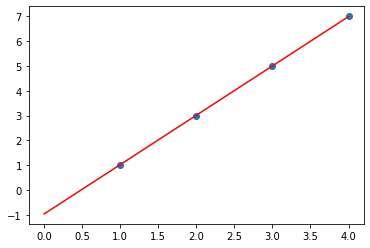

In [17]:
plt.plot(x_data, y_data, 'o')
plt.plot([0, 4], [b, (w*4 + B)], 'r-')
plt.show()

In [18]:
# 학습이 끝난 후 W와 b로 예측

print(history)
print("W :", W)
print("b:", b)
print("input 3", tf.add(tf.matmul([[3.]], W), b))
print("input 4", tf.add(tf.matmul([[4.]], W), b))

[[ 1.7775513e+00  1.5484213e+00 -6.7529398e-01]
 [ 1.3846369e+00  1.5686586e+00 -6.6895622e-01]
 [ 1.0802130e+00  1.5875834e+00 -6.6306621e-01]
 ...
 [ 1.2543633e-07  1.9869173e+00 -9.6121031e-01]
 [ 1.2483247e-07  1.9869331e+00 -9.6125698e-01]
 [ 1.2423277e-07  1.9869487e+00 -9.6130365e-01]]
W : <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.9869487]], dtype=float32)>
b: <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[-0.96130365]], dtype=float32)>
input 3 tf.Tensor([[4.999542]], shape=(1, 1), dtype=float32)
input 4 tf.Tensor([[6.986491]], shape=(1, 1), dtype=float32)


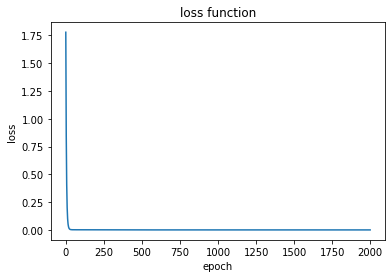

In [19]:
# loss function
plt.plot(history[:,0])
plt.title('loss function')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

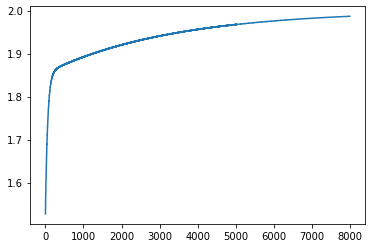

In [20]:
a = np.array(w_trace)
a = a.reshape(8000,1)
plt.plot(a)
plt.show()

# Multi Regression

In [21]:
import tensorflow as tf

## data 선언
x_data = [[2.,0.,7.], [6.,4.,2.], [5.,2.,4.],[8.,4.,1]]
y_data = [[75], [95], [91], [97]]
test_data=[[5.,5.,5.]]
print(len(x_data),len(x_data[1]))  # 행크기 , 열크기

4 3


In [22]:
model = tf.keras.Sequential()   ## 모델 만들기 위해 sequential 매서드를 선언. 이를 통해 모델을 만들 수 있다.
model.add(tf.keras.layers.Dense(1, input_dim=3)) # 선언된 모델에 add를 통해 쌓아감. , 현재는 입력 변수 갯수 3, perceptron 1개.
model.summary() ## 설계한 모델 프린트

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [23]:
loss = tf.keras.losses.mse # mean squre error
optimizer = tf.keras.optimizers.SGD(lr=0.01)
metrics = tf.keras.metrics.mae # mean absolute error ㅣ예측값 - 정답ㅣ

# 모델 컴파일하기
model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

# 모델 동작하기
model.fit(x_data, y_data, epochs=20, batch_size=2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
2/2 [==============================] - 0s 6ms/step - loss: 3830.0190 - mean_absolute_error: 47.8969
Epoch 2/20
2/2 [==============================] - 0s 5ms/step - loss: 57.3003 - mean_absolute_error: 5.8998
Epoch 3/20
2/2 [==============================] - 0s 5ms/step - loss: 22.1918 - mean_absolute_error: 3.8621
Epoch 4/20
2/2 [==============================] - 0s 4ms/step - loss: 21.9516 - mean_absolute_error: 3.0221
Epoch 5/20
2/2 [==============================] - 0s 2ms/step - loss: 20.9262 - mean_absolute_error: 3.9754
Epoch 6/20
2/2 [==============================] - 0s 5ms/step - loss: 29.7230 - mean_absolute_error: 5.1424
Epoch 7/20
2/2 [==============================] - 0s 6ms/step - loss: 18.4825 - mean_absolute_error: 3.2856
Epoch 8/20
2/2 [==============================] - 0s 3ms/step - loss: 15.7639 - mean_absolute_error: 2.9270
Epoch 9/20
2/2 [==============================] - 0s 2ms/step - loss: 11.1209 - mean_absolute_error: 2.9869
Epoch 10/20
2/2 [========

In [24]:
# 결과를 출력
print(model.weights)
print("test data [5., 5., 5.] 예측 값 :", model.predict(test_data))

[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[8.890531],
       [5.564671],
       [8.434526]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([2.0618906], dtype=float32)>]
test data [5., 5., 5.] 예측 값 : [[116.51053]]


# Binary Classification

In [25]:
import tensorflow as tf

## data 선언
x_data = [[0.,0.], [0.,1.], [1.,0.],[1.,1.]]
y_data = [[0.], [1.], [1.], [1.]]
test_data=[[0.3, 0.3]]

In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,input_dim=2))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [28]:
loss = tf.keras.losses.mse # mean squre error 
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01) 
metrics = tf.keras.metrics.mae 

# 모델 컴파일하기
model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

In [30]:
# 모델 학습
model.fit(x_data, y_data, epochs=20, batch_size=4)

Epoch 1/20
1/1 [==============================] - 0s 4ms/step - loss: 0.7404 - mean_absolute_error: 0.8152
Epoch 2/20
1/1 [==============================] - 0s 4ms/step - loss: 0.7049 - mean_absolute_error: 0.7988
Epoch 3/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6717 - mean_absolute_error: 0.7830
Epoch 4/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6405 - mean_absolute_error: 0.7677
Epoch 5/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6112 - mean_absolute_error: 0.7528
Epoch 6/20
1/1 [==============================] - 0s 4ms/step - loss: 0.5837 - mean_absolute_error: 0.7384
Epoch 7/20
1/1 [==============================] - 0s 3ms/step - loss: 0.5579 - mean_absolute_error: 0.7244
Epoch 8/20
1/1 [==============================] - 0s 5ms/step - loss: 0.5337 - mean_absolute_error: 0.7109
Epoch 9/20
1/1 [==============================] - 0s 4ms/step - loss: 0.5109 - mean_absolute_error: 0.6978
Epoch 10/20
1/1 [====================

In [31]:
print(model.weights)
print("test data [0.3, 0.3] 예측 값 :", model.predict(test_data))

if model.predict(test_data) >0.5:
    print("합격")
else:
    print("불합격")

[<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.07345849],
       [-0.1163912 ]], dtype=float32)>, <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.55359125], dtype=float32)>]
test data [0.3, 0.3] 예측 값 : [[0.49663633]]
불합격


# Logistic Regression

In [32]:
import tensorflow as tf

## data 선언
x_data = [[5.], [30.], [95.], [100.], [265.], [270.], [290.], [300.],[365.]]
y_data = [[0.], [0.], [0.], [0.], [1.], [1.], [1.], [1.], [1.]]
test_data= [[7.]]
test_data2= [[80.]]
test_data3= [[110.]]
test_data4= [[180.]]
test_data5= [[320.]]

In [33]:
## tf.keras를 활용한 perceptron 모델 구현.
model = tf.keras.Sequential() ## 모델 선언
model.add(tf.keras.layers.Dense(1, input_dim=1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [34]:
loss = tf.keras.losses.mse # mean squre error ### 경사 하강법으로 global min 에 찾아가는 최적화 방법 선언.
optimizer = tf.keras.optimizers.SGD(lr=0.01) ## 예측값 과 정답의 오차값 정의. mse는 mean squre error로 (예측값 - 정답)^2 를 의미
metrics = tf.keras.metrics.binary_accuracy # mean absolute error ㅣ예측값 - 정답ㅣ

# 모델 컴파일하기
model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [35]:
model.fit(x_data, y_data, epochs=1500, batch_size=2)

Epoch 1/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.4444 - binary_accuracy: 0.5556
Epoch 2/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.4444 - binary_accuracy: 0.5556
Epoch 3/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.4444 - binary_accuracy: 0.5556
Epoch 4/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.4444 - binary_accuracy: 0.5556
Epoch 5/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.4444 - binary_accuracy: 0.5556
Epoch 6/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.4444 - binary_accuracy: 0.5556
Epoch 7/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.4444 - binary_accuracy: 0.5556
Epoch 8/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.4444 - binary_accuracy: 0.5556
Epoch 9/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.4444 - binary_accuracy: 0.5556
Epoch 10/1500
5/5 [==============================] - 0s

In [36]:
print(" test data [7.] 예측 값 : ", model.predict(test_data))
print(" test data [80.] 예측 값 : ", model.predict(test_data2))
print(" test data [110.] 예측 값 : ", model.predict(test_data3))
print(" test data [180.] 예측 값 : ", model.predict(test_data4))
print(" test data [320.] 예측 값 : ", model.predict(test_data5))

 test data [7.] 예측 값 :  [[0.99998635]]
 test data [80.] 예측 값 :  [[1.]]
 test data [110.] 예측 값 :  [[1.]]
 test data [180.] 예측 값 :  [[1.]]
 test data [320.] 예측 값 :  [[1.]]


# XOR Problem

In [37]:
x_data = [[0.,0.], [0.,1.], [1., 0.], [1.,1.]]
y_data = [[0.], [1.], [1.],[0.]]
test_data = [[0.5, 0.5]]

In [38]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_dim=2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(5, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [39]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.5) ### 경사 하강법으로 global min 에 찾아가는 최적화 방법 선언.
loss=tf.keras.losses.binary_crossentropy  ## 예측값 과 정답의 오차값 정의.
metrics=tf.keras.metrics.binary_accuracy ### 학습하면서 평가할 메트릭스 선언언

model.compile(loss =loss, optimizer= optimizer, metrics=[metrics])

In [40]:
hist = model.fit(x_data, y_data, epochs=2000, batch_size=4)

Epoch 1/2000
1/1 [==============================] - 0s 428ms/step - loss: 0.6947 - binary_accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6937 - binary_accuracy: 0.5000
Epoch 3/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6933 - binary_accuracy: 0.5000
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 5/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6930 - binary_accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6929 - binary_accuracy: 0.7500
Epoch 7/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6929 - binary_accuracy: 0.7500
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6929 - binary_accuracy: 0.7500
Epoch 9/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6929 - binary_accuracy: 0.7500
Epoch 10/2000
1/1 [==============================] - 

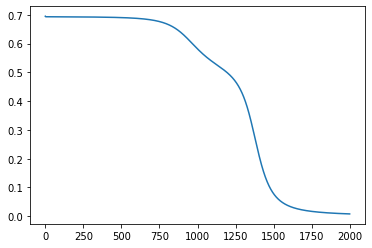

In [41]:
plt.plot(hist.history['loss'])

In [42]:
print(" test data [0.5 0.5] 예측 값 : ", model.predict(test_data))

 test data [0.5 0.5] 예측 값 :  [[0.9919025]]
